In [1]:
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
def distDataPoint(time,cores,executors,maxPartitions,samplingPartitions,splitMatrix):
    return {
        'time': time, 'cores': cores, 'executors': executors, 'maxPartitions': maxPartitions,
        'samplingPartitions': samplingPartitions, 'splitMatrix': splitMatrix
    }

In [3]:
cores = [1,4,9,16]
time_total = [100.5,40.2,27.3,19.0]
time_dissim = [96.4,35.8,21.9,13.8]

inde = range(1,20)
expo = [time_dissim[1]*4/i for i in inde]

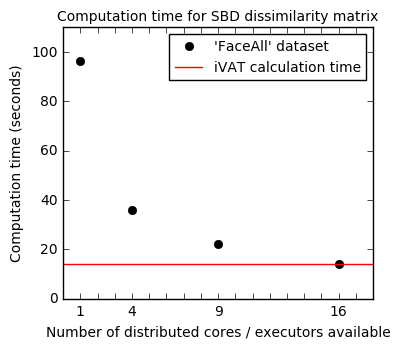

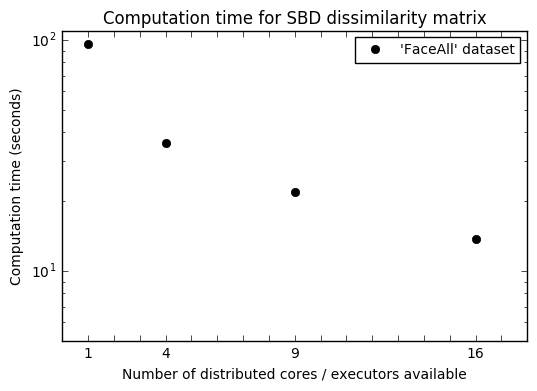

In [39]:
#plt.plot(cores,time_total,'go',label='')
sb1 = figure(figsize = (4,3.5));
plt.plot(cores,time_dissim,'ko',label='\'FaceAll\' dataset');
plt.plot([0,20],[14.114665031433105,14.114665031433105],'r',label='iVAT calculation time');
ax = sb1.get_axes()[0].get_xaxis()
ax.set_ticks(range(1,18))
tklbs = ['' for i in range(1,18)]
for i in range(1,5): tklbs[i*i-1] = i*i
ax.set_ticklabels(tklbs)
#plt.plot(inde,expo)
plt.axis([None,18,0,110],fontsize='medium')
plt.xlabel('Number of distributed cores / executors available',fontsize='medium')
plt.ylabel('Computation time (seconds)',fontsize='medium')
plt.title('Computation time for SBD dissimilarity matrix',fontsize='medium')
plt.legend(numpoints=1,fontsize='medium');

plt.savefig("./images/dist_time_w_cores.pdf",type="pdf",bbox_inches='tight')

sb2 = figure(figsize = (6,4));
plt.plot(cores,time_dissim,'ko',label='\'FaceAll\' dataset');
ax = sb2.get_axes()[0]
xax = ax.get_xaxis()
xax.set_ticks(range(1,18))
tklbs = ['' for i in range(1,18)]
for i in range(1,5): tklbs[i*i-1] = i*i
xax.set_ticklabels(tklbs)
ax.set_yscale('log')
#plt.plot(inde,expo)
plt.axis([None,18,5,110])
plt.xlabel('Number of distributed cores / executors available')
plt.ylabel('Computation time (seconds)')
plt.title('Computation time for SBD dissimilarity matrix')
plt.legend(numpoints=1,fontsize='medium');


In [40]:
results = np.array([[25, 5, 0.25, 20.245777130126953, 1.6418039798736572, 1.0827839374542236, 0.05900287628173828, 0.36163806915283203],
                    [25, 10, 0.25, 21.363548040390015, 3.9520750045776367, 0.9524469375610352, 0.03561806678771973, 0.3035109043121338],
                    [25, 20, 0.25, 20.868146181106567, 7.745929956436157, 0.7924458980560303, 0.03124713897705078, 0.3694298267364502],
                    [25, 5, 0.5, 21.033538818359375, 2.014000177383423, 1.0812468528747559, 0.06787395477294922, 1.8291912078857422],
                    [25, 5, 1.0, 21.775142002105713, 0.0, 0.0, 0.10024094581604004, 14.114665031433105]])

# Manually changed last row to assist with plotting - original data below:
#[25, 5, 1.0, 0.8444170951843262, 0.0, 21.975142002105713, 0.10024094581604004, 14.114665031433105]

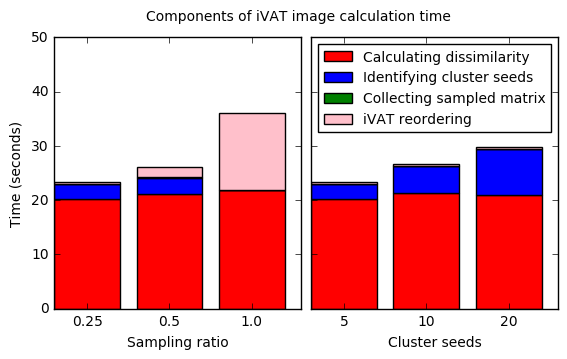

In [41]:
fig = figure(figsize=(6.5,3.5))

plt.suptitle('Components of iVAT image calculation time',fontsize='medium')

sub2 = subplot(1,2,1)
ind = range(3)
sampdisstime = results[[0,3,4],3]
sampdingtime = results[[0,3,4],4]
sampsamptime = results[[0,3,4],5]
sampcombtime = sampdingtime+sampsamptime
sampmattime = results[[0,3,4],6]
sampvattime = results[[0,3,4],7]
plt.bar(ind,sampdisstime,color='r',label='Calculating dissimilarity')
base1 = sampdisstime.copy()
plt.bar(ind,sampcombtime,bottom=base1,color='b',label='Identifying cluster seeds')
base1 += sampcombtime
plt.bar(ind,sampmattime,bottom=base1,color='g',label='Collecting matrix')
base1 += sampmattime
plt.bar(ind,sampvattime,bottom=base1,color='pink',label='iVAT reordering')
plt.axis([None,None,0,50],fontsize='medium')
plt.xticks([0.4,1.4,2.4], ('0.25', '0.5', '1.0'),fontsize='medium')
plt.ylabel('Time (seconds)',fontsize='medium')
plt.xlabel('Sampling ratio',fontsize='medium')

sub1 = subplot(1,2,2)
ind = range(3)
ratdisstime = results[0:3,3]
ratdingtime = results[0:3,4]
ratsamptime = results[0:3,5]
ratcombtime = ratdingtime+ratsamptime
ratmattime = results[0:3,6]
ratvattime = results[0:3,7]
plt.bar(ind,ratdisstime,color='r',label='Calculating dissimilarity')
base2 = ratdisstime.copy()
plt.bar(ind,ratcombtime,bottom=base2,color='b',label='Identifying cluster seeds')
base2 += ratcombtime
plt.bar(ind,ratmattime,bottom=base2,color='g',label='Collecting sampled matrix')
base2 += ratmattime
plt.bar(ind,ratvattime,bottom=base2,color='pink',label='iVAT reordering')
plt.xticks([0.4,1.4,2.4], ('5', '10', '20'),fontsize='medium')
xax = sub1.axes.yaxis.set_ticklabels([])
plt.xlabel('Cluster seeds',fontsize='medium')
plt.axis([None,None,0,50])
plt.legend(fontsize='medium')

fig.subplots_adjust(wspace = 0.04)

plt.savefig("./images/dist_time_w_ratio-pclust.pdf",type="pdf",bbox_inches='tight')

In [42]:
results = np.array([[25, 5, 0.25, 7.842128038406372, 0.016887187957763672, 3.6769678592681885, 0.34485602378845215],
                    [25, 10, 0.25, 10.562991857528687, 0.02172708511352539, 3.5780279636383057, 0.3326139450073242],
                    [25, 20, 0.25, 16.068857192993164, 0.016966819763183594, 3.2867791652679443, 0.3536238670349121],
                    [25, 5, 0.5, 7.89321494102478, 0.026523113250732422, 8.035875082015991, 1.8468689918518066],
                    [25, 5, 1.0, 0.0,              0.000000000000000,    21.975142002105713, 14.114665031433105]])

# Manually changed last row to assist with plotting - original data below:
#[25, 5, 1.0, 0.8444170951843262, 0.0, 21.975142002105713, 0.10024094581604004, 14.114665031433105]

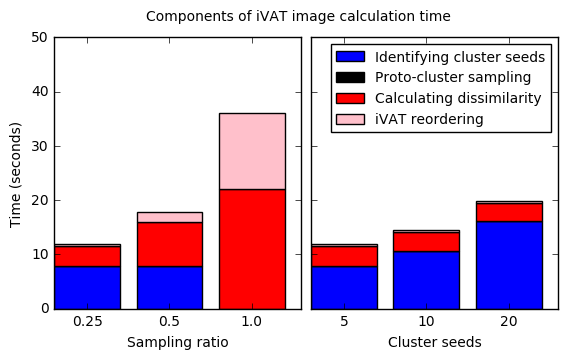

In [43]:
fig = figure(figsize=(6.5,3.5))

plt.suptitle('Components of iVAT image calculation time',fontsize='medium')

sub2 = subplot(1,2,1)
ind = range(3)

sampdingtime = results[[0,3,4],3]
sampsindtime = results[[0,3,4],4]
sampdisstime = results[[0,3,4],5]
sampvattime = results[[0,3,4],6]
plt.bar(ind,sampdingtime,color='b',label='Identifying cluster seeds')
base1 = sampdingtime.copy()
plt.bar(ind,sampsindtime,bottom=base1,color='k',label='Centralised sampling')
base1 += sampsindtime
plt.bar(ind,sampdisstime,bottom=base1,color='r',label='Calculate dissimilarity')
base1 += sampdisstime
plt.bar(ind,sampvattime,bottom=base1,color='pink',label='iVAT reordering')
plt.axis([None,None,0,50],fontsize='medium')
plt.xticks([0.4,1.4,2.4], ('0.25', '0.5', '1.0'),fontsize='medium')
plt.ylabel('Time (seconds)',fontsize='medium')
plt.xlabel('Sampling ratio',fontsize='medium')

sub1 = subplot(1,2,2)
ind = range(3)
ratdingtime = results[0:3,3]
ratsamptime = results[0:3,4]
ratdisstime = results[0:3,5]
ratvattime = results[0:3,6]
plt.bar(ind,ratdingtime,color='b',label='Identifying cluster seeds')
base2 = ratdingtime.copy()
plt.bar(ind,ratsamptime,bottom=base2,color='k',label='Proto-cluster sampling')
base2 += ratsamptime
plt.bar(ind,ratdisstime,bottom=base2,color='r',label='Calculating dissimilarity')
base2 += ratdisstime
plt.bar(ind,ratvattime,bottom=base2,color='pink',label='iVAT reordering')
plt.xticks([0.4,1.4,2.4], ('5', '10', '20'),fontsize='medium')
xax = sub1.axes.yaxis.set_ticklabels([])
plt.xlabel('Cluster seeds',fontsize='medium')
plt.axis([None,None,0,50])
plt.legend(fontsize='medium')

fig.subplots_adjust(wspace = 0.04)

plt.savefig("./images/dist_time_w_ratio-pclust_svat.pdf",type="pdf",bbox_inches='tight')

In [44]:
#Variance of distributed dissimilarity
sampledResults = np.array([[20, 5, 0.1, 8.60883378982544, 5.595012187957764, 0.0038290023803710938, 0.023494958877563477],
                    [20, 5, 0.1, 9.160057067871094, 5.41008996963501, 0.004003047943115234, 0.04329180717468262],
                    [20, 5, 0.1, 8.54041314125061, 5.111821889877319, 0.0046880245208740234, 0.036514997482299805],
                    [20, 5, 0.1, 9.472408056259155, 5.897416114807129, 0.004492998123168945, 0.029709815979003906],
                    [20, 5, 0.1, 4.665065050125122, 5.40132999420166, 0.0039119720458984375, 0.036108970642089844],
                    [20, 5, 0.1, 8.908052921295166, 6.050817966461182, 0.004297971725463867, 0.03473496437072754],
                    [20, 5, 0.1, 9.09819221496582, 6.369772911071777, 0.00438690185546875, 0.0328371524810791],
                    [20, 5, 0.1, 9.270270109176636, 5.637720823287964, 0.0037980079650878906, 0.03943920135498047],
                    [20, 5, 0.1, 9.397047996520996, 5.262730121612549, 0.004514932632446289, 0.031388044357299805],
                    [20, 5, 0.1, 10.130515098571777, 5.903604030609131, 0.005555868148803711, 0.026278018951416016],
                    [20, 5, 0.1, 9.365026950836182, 5.326664924621582, 0.004867076873779297, 0.03693103790283203],
                    [20, 5, 0.1, 9.731816053390503, 4.898555040359497, 0.004700899124145508, 0.027585983276367188],
                    [20, 5, 0.1, 9.016451120376587, 6.237181901931763, 0.004146099090576172, 0.04102802276611328],
                    [20, 5, 0.1, 9.705404043197632, 5.274148941040039, 0.004564046859741211, 0.03796792030334473],
                    [20, 5, 0.1, 8.335526943206787, 6.2350099086761475, 0.00417017936706543, 0.027971982955932617],
                    [20, 5, 0.1, 8.82007384300232, 5.821149110794067, 0.003732919692993164, 0.038655996322631836],
                    [20, 5, 0.1, 9.486731052398682, 5.457463979721069, 0.005136013031005859, 0.02945399284362793],
                    [20, 5, 0.1, 8.687651872634888, 6.278444051742554, 0.0040781497955322266, 0.035156965255737305],
                    [20, 5, 0.1, 9.471839904785156, 6.270283222198486, 0.0038039684295654297, 0.04014897346496582],
                    [20, 5, 0.1, 9.470444917678833, 5.512761116027832, 0.0041010379791259766, 0.0330510139465332]])

reducedResults = np.array([[20, 5, 0.1, 0.012334108352661133, 4.237152099609375, 0.004495859146118164, 0.0305020809173584],
                    [20, 5, 0.1, 0.015074968338012695, 4.419013023376465, 0.0052340030670166016, 0.02542901039123535],
                    [20, 5, 0.1, 0.014919042587280273, 4.101546049118042, 0.003712892532348633, 0.029421091079711914],
                    [20, 5, 0.1, 0.02493906021118164, 3.9157209396362305, 0.004203081130981445, 0.030460834503173828],
                    [20, 5, 0.1, 0.016158103942871094, 4.352355003356934, 0.0037589073181152344, 0.03544306755065918],
                    [20, 5, 0.1, 0.013383865356445312, 4.440913200378418, 0.004191875457763672, 0.03650999069213867],
                    [20, 5, 0.1, 0.016697168350219727, 4.480538845062256, 0.0035660266876220703, 0.035542964935302734],
                    [20, 5, 0.1, 0.01401209831237793, 4.314141035079956, 0.0039000511169433594, 0.03379392623901367],
                    [20, 5, 0.1, 0.015774965286254883, 4.405466079711914, 0.004806995391845703, 0.026998043060302734],
                    [20, 5, 0.1, 0.021341800689697266, 4.222620964050293, 0.003988027572631836, 0.03105902671813965],
                    [20, 5, 0.1, 0.013994932174682617, 4.175431966781616, 0.003645181655883789, 0.023775815963745117],
                    [20, 5, 0.1, 0.01860499382019043, 4.131059885025024, 0.0035130977630615234, 0.02626490592956543],
                    [20, 5, 0.1, 0.02013111114501953, 4.225564956665039, 0.004441022872924805, 0.04237794876098633],
                    [20, 5, 0.1, 0.016438961029052734, 4.2152180671691895, 0.0037660598754882812, 0.03423595428466797],
                    [20, 5, 0.1, 0.02506113052368164, 4.100303888320923, 0.0038330554962158203, 0.026086091995239258],
                    [20, 5, 0.1, 0.01695394515991211, 4.332104921340942, 0.003793954849243164, 0.0323641300201416],
                    [20, 5, 0.1, 0.019192934036254883, 4.207694053649902, 0.003618001937866211, 0.03543591499328613],
                    [20, 5, 0.1, 0.012042999267578125, 4.148032903671265, 0.0037920475006103516, 0.0350649356842041],
                    [20, 5, 0.1, 0.017346858978271484, 4.312349081039429, 0.003721952438354492, 0.03412604331970215],
                    [20, 5, 0.1, 0.012159109115600586, 4.248476028442383, 0.003877878189086914, 0.03571820259094238]])

In [45]:
samDissimTime = sampledResults[:,4]
redDissimTime = reducedResults[:,4]

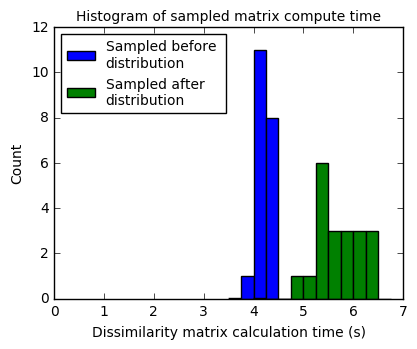

In [51]:
fig = figure(figsize=(4.5,3.5))
plt.hist(redDissimTime,bins=arange(3.5,5.0,0.25),label='Sampled before \ndistribution')
plt.hist(samDissimTime,bins=arange(4.0,7.0,0.25),label='Sampled after \ndistribution')
plt.xlabel('Dissimilarity matrix calculation time (s)',fontsize='medium')
plt.ylabel('Count',fontsize='medium')
plt.title('Histogram of sampled matrix compute time' ,fontsize='medium')
plt.axis([0,7,None,None])
plt.legend(fontsize='medium',loc=2)
plt.savefig("./images/sampled_matrix_hist.pdf",type="pdf",bbox_inches='tight')